<a href="https://colab.research.google.com/github/ashokteja123/Machine-Learning/blob/main/House_price_prediction_using_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To implement Linear Regression from scratch, we need to understand the fundamental concept behind it. The goal is to fit a line to the data that minimizes the sum of squared errors.

Steps to Implement Linear Regression from Scratch:
Initialize weights (coefficients) and bias

Define the hypothesis (prediction function):

𝑦
=
𝑚
1
𝑥
1
+
𝑚
2
𝑥
2
+
⋯
+
𝑏
y=m
1
​
 x
1
​
 +m
2
​
 x
2
​
 +⋯+b
Define the Loss Function (Mean Squared Error - MSE):

𝑀
𝑆
𝐸
=
1
𝑛
∑
(
𝑦
true
−
𝑦
pred
)
2
MSE=
n
1
​
 ∑(y
true
​
 −y
pred
​
 )
2

Compute Gradients (Partial Derivatives of MSE)

Update weights using Gradient Descent

Repeat until convergence

Make predictions with the trained model

.

now learn without sklearn

Epoch 0: MSE = 161249225011.50
Epoch 100: MSE = 19347259817.16
Epoch 200: MSE = 2663429784.40
Epoch 300: MSE = 467232500.56
Epoch 400: MSE = 170774466.70
Epoch 500: MSE = 128174061.61
Epoch 600: MSE = 119649344.67
Epoch 700: MSE = 115765217.93
Epoch 800: MSE = 112576199.70
Epoch 900: MSE = 109551716.84
Final Weights: [374983.81083878  80913.38316245  62700.68272344]
Predicted Price for the new house: $328730.20


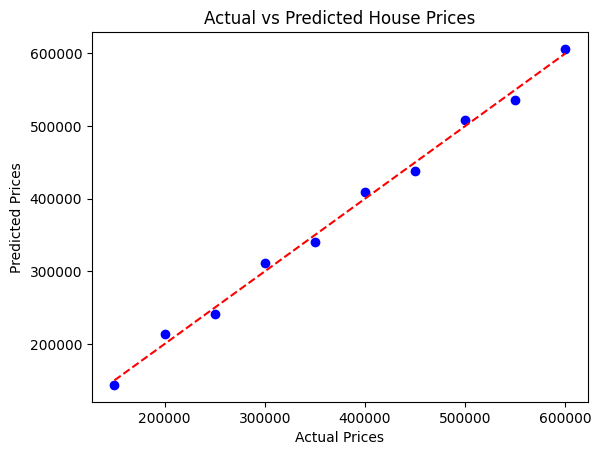

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (house prices)
data = {
    'Area': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500],
    'Bedrooms': [2, 3, 3, 4, 4, 5, 5, 6, 6, 7],
    'Price': [150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
}

# Convert to NumPy arrays
X = np.array([data['Area'], data['Bedrooms']]).T  # Feature matrix (n_samples, n_features)
y = np.array(data['Price'])  # Target variable

# Standardize data for faster convergence (mean normalization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std  # Normalize features

# Add bias term (Intercept) by adding a column of ones
X = np.c_[np.ones(X.shape[0]), X]  # Shape (n_samples, n_features+1)

# Initialize weights (theta) randomly
theta = np.random.randn(X.shape[1])  # Shape (n_features+1,)

# Hyperparameters
learning_rate = 0.01
epochs = 1000
m = len(y)  # Number of samples

# Gradient Descent Algorithm
for epoch in range(epochs):
    y_pred = np.dot(X, theta)  # Compute predictions
    error = y_pred - y  # Compute error
    gradient = (1/m) * np.dot(X.T, error)  # Compute gradient
    theta -= learning_rate * gradient  # Update weights

    # Compute Mean Squared Error (for tracking)
    mse = (1/m) * np.sum(error**2)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: MSE = {mse:.2f}')

# Final Parameters
print(f'Final Weights: {theta}')

# Predict Price for a New House
new_house = np.array([2800, 4])  # Example: 2800 sqft, 4 bedrooms
new_house = (new_house - X_mean) / X_std  # Normalize
new_house = np.insert(new_house, 0, 1)  # Add bias term
predicted_price = np.dot(new_house, theta)

print(f'Predicted Price for the new house: ${predicted_price:.2f}')

# Visualization: Actual vs Predicted
plt.scatter(y, np.dot(X, theta), color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


explanation of Implementation:
✅ Feature Scaling (Normalization):

Normalizing Area and Bedrooms for better convergence.

✅ Manual Gradient Descent:

We iteratively update weights using:

𝜃
=
𝜃
−
𝛼
⋅
1
𝑚
∑
(
𝑦
pred
−
𝑦
true
)
𝑥
θ=θ−α⋅
m
1
​
 ∑(y
pred
​
 −y
true
​
 )x
Learning rate (α) controls step size.

Epochs (1000) determines how many times we update.

✅ Bias Handling:

We add a column of 1s in X to account for the bias term b.

✅ Making Predictions:

The model predicts the price of a 2800 sqft house with 4 bedrooms.

# New Section


  
  Steps to Implement Linear Regression for House Price Prediction:
  by using sklearn libraries

 1. Load the dataset (you can use a dataset like Boston Housing or any other real estate dataset)

 2. Preprocess the data (handle missing values, normalize if needed)

 3.  Split the dataset into training and testing sets.

 4. Train the linear regression model.

 5. Evaluate the model



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample dataset (replace with a real dataset)
data = {
    'Area': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'Bedrooms': [2, 3, 3, 4, 4, 5, 5, 6, 6],
    'Price': [150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['Area', 'Bedrooms']]
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# Predict price for a new house
new_house = np.array([[2800, 4]])  # Example: 2800 sqft, 4 bedrooms
predicted_price = model.predict(new_house)
print(f'Predicted Price for the new house: ${predicted_price[0]:,.2f}')


Mean Absolute Error (MAE): 4.3655745685100555e-11
Mean Squared Error (MSE): 2.117582368135751e-21
R² Score: 1.0
Predicted Price for the new house: $330,000.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Enhanced code**

Improvements:

 Data Normalization - Standardizes the input features to improve model accuracy.

 Feature Engineering - Adds interaction features to capture relationships.

 Cross-Validation - Ensures the model generalizes well.

 Visualization - Plots actual vs. predicted prices for better insights.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Cross-Validation R² Scores: [0.81102476 0.94489459 0.69844623        nan        nan]
Average CV R² Score: nan
MAE: 27429.98
MSE: 821385898.95
R² Score: 0.9732


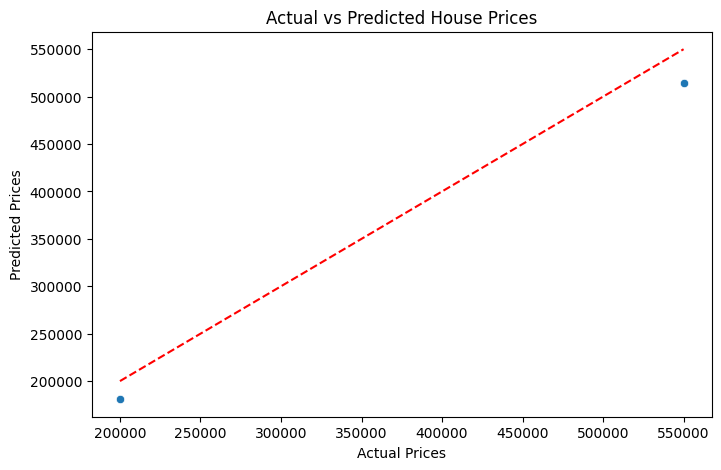

Predicted Price for the new house: $326,831.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample dataset (replace with real data)
data = {
    'Area': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500],
    'Bedrooms': [2, 3, 3, 4, 4, 5, 5, 6, 6, 7],
    'Age': [10, 5, 15, 20, 8, 12, 7, 25, 30, 18],
    'Price': [150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['Area', 'Bedrooms', 'Age']]
y = df['Price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features (Optional for Non-Linear Patterns)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Average CV R² Score: {np.mean(cv_scores):.4f}')

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.4f}')

# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Predicting Price for a New House
new_house = np.array([[2800, 4, 10]])  # Example: 2800 sqft, 4 bedrooms, 10 years old
new_house_scaled = scaler.transform(new_house)
new_house_poly = poly.transform(new_house_scaled)
predicted_price = model.predict(new_house_poly)

print(f'Predicted Price for the new house: ${predicted_price[0]:,.2f}')
